In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
#D:\ClimateChange\RawData\Pressure_wind
data =  pd.read_csv('./Pressure_training/year2_cut_minmax_norm_minmax_wind_standard.csv',index_col=0)
data

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
0,0.266183,0.267322,0.267839,0.268356,0.269669,0.271125,0.272727,0.274101,0.276006,0.277690,...,-0.577208,-0.542816,-0.512479,0.920792,0.115385,1.0,1.0,0.0,0.0,CL
1,0.548938,0.548604,0.548087,0.547053,0.546066,0.545360,0.544935,0.543512,0.542081,0.540682,...,-0.007829,0.019318,-0.020105,0.980198,0.403846,1.0,1.0,0.0,1.0,CL
2,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.345826,0.395209,0.455036,0.297030,0.346154,0.0,1.0,0.0,1.0,CL
3,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.345826,0.395209,0.455036,0.297030,0.346154,0.0,1.0,0.0,1.0,CL
4,0.395650,0.389866,0.385729,0.382110,0.380435,0.378953,0.378182,0.378843,0.378986,0.380577,...,-0.092441,-0.040319,0.000000,0.297030,0.326923,0.0,1.0,0.0,1.0,CL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.859658,0.870734,0.885212,0.897622,0.903209,0.907206,0.908052,0.908286,0.905907,0.900787,...,0.060622,0.029211,0.057017,0.940594,0.884615,1.0,1.0,1.0,1.0,NROI
733,0.916624,0.919855,0.928128,0.934333,0.938406,0.943494,0.947013,0.950495,0.952953,0.955381,...,-0.313943,-0.515909,-0.721354,0.940594,0.980769,1.0,1.0,1.0,1.0,NROI
734,0.932160,0.934850,0.934850,0.935884,0.937371,0.938310,0.940260,0.941636,0.944067,0.949606,...,-0.324436,-0.429663,-0.586023,0.742574,0.923077,1.0,0.0,1.0,1.0,NROI
735,0.879855,0.885729,0.891417,0.895553,0.898551,0.900985,0.902338,0.903075,0.903293,0.902887,...,0.430377,0.435107,0.375798,0.762376,0.865385,1.0,1.0,1.0,1.0,NROI


In [26]:
data_x = data.iloc[:,:681]
data_y = data.iloc[:,681]

In [8]:
data_x

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
0,0.266183,0.267322,0.267839,0.268356,0.269669,0.271125,0.272727,0.274101,0.276006,0.277690,...,-0.621956,-0.577208,-0.542816,-0.512479,0.920792,0.115385,1.0,1.0,0.0,0.0
1,0.548938,0.548604,0.548087,0.547053,0.546066,0.545360,0.544935,0.543512,0.542081,0.540682,...,-0.026608,-0.007829,0.019318,-0.020105,0.980198,0.403846,1.0,1.0,0.0,1.0
2,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.352049,0.345826,0.395209,0.455036,0.297030,0.346154,0.0,1.0,0.0,1.0
3,0.357846,0.355222,0.353671,0.352637,0.352484,0.353033,0.354286,0.356436,0.358599,0.361680,...,0.352049,0.345826,0.395209,0.455036,0.297030,0.346154,0.0,1.0,0.0,1.0
4,0.395650,0.389866,0.385729,0.382110,0.380435,0.378953,0.378182,0.378843,0.378986,0.380577,...,-0.090397,-0.092441,-0.040319,0.000000,0.297030,0.326923,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,0.859658,0.870734,0.885212,0.897622,0.903209,0.907206,0.908052,0.908286,0.905907,0.900787,...,0.099411,0.060622,0.029211,0.057017,0.940594,0.884615,1.0,1.0,1.0,1.0
733,0.916624,0.919855,0.928128,0.934333,0.938406,0.943494,0.947013,0.950495,0.952953,0.955381,...,-0.050072,-0.313943,-0.515909,-0.721354,0.940594,0.980769,1.0,1.0,1.0,1.0
734,0.932160,0.934850,0.934850,0.935884,0.937371,0.938310,0.940260,0.941636,0.944067,0.949606,...,-0.222508,-0.324436,-0.429663,-0.586023,0.742574,0.923077,1.0,0.0,1.0,1.0
735,0.879855,0.885729,0.891417,0.895553,0.898551,0.900985,0.902338,0.903075,0.903293,0.902887,...,0.312746,0.430377,0.435107,0.375798,0.762376,0.865385,1.0,1.0,1.0,1.0


# Kmean

In [6]:
kmeans = KMeans(n_clusters =4).fit(data_x)
kmeans.labels_

D:\Anaconda\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\envs\GPU\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 3,
       3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2,

In [6]:
path = '../RawData/ROI_Pressure/Unnormed/year2_xy_unnormed.csv'
results = []
result_label = []
for a in range (4):
    for b in range (4):
        for c in range (4):
            for d in range (4):
                data =  pd.read_csv(path,index_col=0)
                data_y = data['label']
                for i in range(0,data_y.shape[0]):
                    if data_y[i] == 'CL':
                        data_y[i]=a
                    if data_y[i] == 'COH':
                        data_y[i]=b
                    if data_y[i] == 'COL':
                        data_y[i]=c
                    if data_y[i] == 'NROI':
                        data_y[i]=d
                    if(a==b or a==c or a==d or b==c or b==d or c==d):
                        continue
                    result = sum(1 for x,y in zip(data_y,kmeans.labels_) if x == y) / len(kmeans.labels_)
                    results.append(result)
                    result_label.append([a,b,c,d])

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=d
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=d
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=a
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=c
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_y[i]=b
C:\Users\Ethan\AppData\Local\Temp\ipykernel_5324\114751407.py:18: S

In [7]:
temp = results.copy()
index = np.argsort(temp)
print("max result is :" + str(max(results))+ "and the label for CL, COL, COH, and NROI is :" + str(result_label[index[-1]]))

max result is :0.41383989145183175and the label for CL, COL, COH, and NROI is :[3, 2, 0, 1]


# Som

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
from matplotlib import animation, colors
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [27]:
data =  pd.read_csv('./Pressure_training/year2_cut_minmax_norm_minmax_wind_standard.csv',index_col=0)
data_value = data.values
data_df = pd.DataFrame(data_value)
data=data_df
data
data_x = data.iloc[:,:681]
data_y = data.iloc[:,681]

In [28]:
order = []
order.append(data_y[0])
order.append(data_y[200])
order.append(data_y[600])
order.append(data_y[700])
print(order)

['CL', 'COL', 'COH', 'NROI']


In [29]:
# Helper functions

# Data Normalization
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled

# Euclidean distance
def e_distance(x,y):
    return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
    return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0,0]
    shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
    input_data = data.iloc[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data.iloc[t])
            if distance < shortest_distance: 
                shortest_distance = distance
                winner = [row,col]
    return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
    coefficient = 1.0 - (np.float64(step)/max_steps)
    learning_rate = coefficient*max_learning_rate
    neighbourhood_range = ceil(coefficient * max_m_dsitance)
    return learning_rate, neighbourhood_range

In [30]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(75000)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [31]:
train_x_norm = data_x

In [43]:
#main function

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
    if (step+1) % 5000 == 0:
        print("Iteration: ", step+1) # print out the current iteration for every 5k
    learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

    t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols) ##########################################
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row,col],winner) <= neighbourhood_range:
                som[row][col] += learning_rate*(train_x_norm.iloc[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  5000
Iteration:  10000
Iteration:  15000
Iteration:  20000
Iteration:  25000
Iteration:  30000
Iteration:  35000
Iteration:  40000
Iteration:  45000
Iteration:  50000
Iteration:  55000
Iteration:  60000
Iteration:  65000
Iteration:  70000
Iteration:  75000
SOM training completed


In [32]:
import numpy as gfg
# reshaping the array from 3D
# matrice to 2D matrice.
arr_reshaped = som.reshape(som.shape[0], -1)
  
# saving reshaped array to file.
gfg.savetxt("som_75000.txt", arr_reshaped)

print("shape of arr: ", som.shape)

NameError: name 'som' is not defined

In [33]:
#save and load the som weight map
import numpy as gfg
#shape of arr=[10, 10, 681]  

# retrieving data from file.
loaded_arr = gfg.loadtxt("./Pressure_predictions/som_75000.txt")
  
# This loadedArr is a 2D array, therefore
# we need to convert it to the original
# array shape.reshaping to get original
# matrice with original shape.
load_original_arr = loaded_arr.reshape(
    loaded_arr.shape[0], loaded_arr.shape[1] // 681, 681)
  
# check the shapes:

print("shape of load_original_arr: ", load_original_arr.shape)
som = load_original_arr

shape of load_original_arr:  (10, 10, 681)


# 0-Cl 2-COL 1-COH 3-NROI

In [34]:
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
data_y_label = le.fit_transform(data_y)
 
# printing label
print(order)
print(data_y_label)


['CL', 'COL', 'COH', 'NROI']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [35]:
# collecting labels

label_data = data_y_label
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
    if (t+1) % 1000 == 0:
        print("sample data: ", t+1)
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

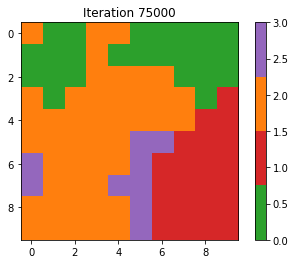

In [37]:
#after mapping x and y: 10 by 10 50000
# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list)==0:
            label = 4
        else:
            label = max(label_list, key=label_list.count)
        label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red','tab:orange','tab:purple'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

In [38]:
#0-Cl 1-COL 2-COH 3-NROI
label_map

array([[2, 0, 0, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 2, 0, 0, 0],
       [2, 0, 2, 2, 2, 2, 2, 2, 0, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 1, 1],
       [2, 2, 2, 2, 2, 3, 3, 1, 1, 1],
       [3, 2, 2, 2, 2, 3, 1, 1, 1, 1],
       [3, 2, 2, 2, 3, 3, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 3, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 3, 1, 1, 1, 1]], dtype=int64)

In [39]:
data = data_x # normalisation

winner_labels = []

for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    predicted = label_map[row][col]
    winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(data_y_label, np.array(winner_labels)))

Accuracy:  0.8466757123473542


In [40]:
print(winner_labels)

[0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 

# Acc for each label

In [19]:
winner_labels = [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 1, 1, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3]

In [20]:
unique, counts = np.unique(data_y_label, return_counts=True)
dict(zip(unique, counts))

{0: 178, 1: 161, 2: 327, 3: 71}

In [21]:
#accuracy for each label
#0-Cl 2-COL 1-COH 3-NROI
acc_cl = sum(1 for x in winner_labels[:178] if x == 0) / 178
acc_col = sum(1 for x in winner_labels[178:505] if x == 2) / 327
acc_coh = sum(1 for x in winner_labels[505:666] if x == 1) / 161
acc_nroi = sum(1 for x in winner_labels[666:] if x == 3) / 71
print(f"acc_CL: {acc_cl}, acc_COL: {acc_col}, acc_COH: {acc_coh}, acc_NROI: {acc_nroi}")

acc_CL: 0.9213483146067416, acc_COL: 0.8440366972477065, acc_COH: 0.968944099378882, acc_NROI: 0.5352112676056338


In [22]:
unique, counts = np.unique(winner_labels[:178], return_counts=True)
print('among all the CL records:')
for i in range(2):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 2:
        temp = 'COL'
    if temp == 1:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')
print("----------")

unique, counts = np.unique(winner_labels[505:666], return_counts=True)
print('among all the COH records:')
for i in range(4):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 2:
        temp = 'COL'
    if temp == 1:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')
print("---------")


unique, counts = np.unique(winner_labels[178:505], return_counts=True)
print('among all the COL records:')
for i in range(4):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 2:
        temp = 'COL'
    if temp == 1:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')
    
print("---------")
    
unique, counts = np.unique(winner_labels[666:], return_counts=True)
print('among all the NROI records:')
for i in range(3):
    temp = unique[i]
    if temp == 0:
        temp = 'CL'
    if temp == 2:
        temp = 'COL'
    if temp == 1:
        temp = 'COH'
    if temp == 3:
        temp = 'NROI'
    print(f'{counts[i]} were classified as {temp}')

among all the CL records:
164 were classified as CL
14 were classified as COL
----------
among all the COH records:
2 were classified as CL
156 were classified as COH
2 were classified as COL
1 were classified as NROI
---------
among all the COL records:
40 were classified as CL
1 were classified as COH
276 were classified as COL
10 were classified as NROI
---------
among all the NROI records:
3 were classified as COH
30 were classified as COL
38 were classified as NROI


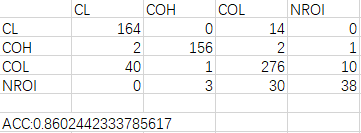

# Draw the label onto the visualization file

#### create the data list for this scenrio, can use it for later also

In [49]:
counter = 0
for i in order:
    path = "./Pressure_training/Labeled_minmax_cut/" + str(i)
    for filename in os.listdir(path):
        withoutday = filename[3:]
        withoutcsv = withoutday[:-4]
        with open("./datalist.txt","a")as file:
            content = [str(withoutcsv) ,"\n"]
            file.writelines(content)
            file.close()
            counter = counter + 1
print(f"we write {counter} files")

we write 737 files


In [50]:
data1 = pd.read_table("./dataList.txt",sep = '_', header = None)
data1.columns = ['Day', 'Cluster','ConnectedComponent','CenterX','CenterY']
data1['Predict'] = winner_labels
data1

,Day,Cluster,ConnectedComponent,CenterX,CenterY,Predict
0,100,c4,cp2,94,17,0
1,116,c7,cp2,100,32,2
2,120,c1,cp2,31,29,0
3,120,c2,cp2,31,29,0
4,121,c2,cp2,31,28,0
...,...,...,...,...,...,...
732,638,c11,cp2,96,57,2
733,643,c12,cp2,96,62,2
734,646,c12,cp2,76,59,2
735,694,c15,cp2,78,56,3


In [54]:
day = data1['Day'][1]
day

116

In [56]:
for i in range(data1.shape[0]): 
    day = data1['Day'][i]
    C = data1['Cluster'][i]
    CC = data1['ConnectedComponent'][i]
    cx = data1['CenterX'][i]
    cy = data1['CenterY'][i]
    P = data1['Predict'][i]

100 94 17
116 100 32
120 31 29
120 31 29
121 31 28
125 49 32
127 96 38
127 96 38
128 98 38
128 98 38
133 52 12
134 57 16
134 57 16
135 64 17
135 64 17
136 68 18
159 14 30
164 86 12
166 95 12
16 58 11
174 54 23
176 81 15
179 24 20
17 25 23
180 53 39
183 86 17
184 93 20
189 24 34
191 88 14
192 73 13
193 70 16
194 72 17
195 76 17
198 74 15
199 75 17
200 78 19
201 81 20
201 81 20
202 89 21
203 95 21
219 95 15
228 87 11
252 71 15
254 86 16
255 92 11
258 84 23
259 91 20
260 98 19
307 86 24
308 88 22
309 91 20
312 80 31
313 85 27
329 82 14
330 76 12
336 91 11
349 11 22
350 78 21
351 85 20
356 100 23
359 74 27
360 78 25
361 80 24
362 84 25
363 26 27
367 100 27
371 77 11
373 68 14
37 83 11
381 76 24
385 91 26
386 98 21
387 102 17
38 86 14
393 64 19
394 69 27
396 79 26
397 82 25
398 92 27
41 25 17
42 17 18
432 102 29
433 101 31
433 101 31
433 101 31
43 14 18
443 71 16
444 67 21
445 70 23
447 73 25
448 78 23
449 83 22
450 90 19
450 91 19
451 91 21
451 91 21
454 68 13
454 15 29
455 69 15
456 71 15

In [65]:
#N:\Github\ClimateChange\Pressure_mapping\Pressure_img
import cv2
import cv2 as cv
for i in range(data1.shape[0]): 
    day = data1['Day'][i]
    #print(day)
    C = data1['Cluster'][i]
    CC = data1['ConnectedComponent'][i]
    cx = data1['CenterX'][i]
    cy = data1['CenterY'][i]
    P = data1['Predict'][i]
    #print(cx)
    #print(cy)
    im = cv.imread('./Pressure_mapping/Pressure_img/day' + str(day) + '.png',cv.IMREAD_COLOR)
    if (P == 0):
        #Blue Circle for CL
        image = cv2.circle(im, (cx,cy), radius=2, color=(255, 0, 0), thickness=-1) 
        cv2.imwrite('./Pressure_predictions/Som/day' + str(day) + '.png',image)
    elif(P == 1):
        #Red Circle for COH
        image = cv2.circle(im, (cx,cy), radius=2, color=(0, 0, 255), thickness=-1) 
        cv2.imwrite('./Pressure_predictions/Som/day' + str(day) + '.png',image)
    elif(P == 2):
        #Green Circle for COL
        image = cv2.circle(im, (cx,cy), radius=2, color=(0, 255, 0), thickness=-1) 
        cv2.imwrite('./Pressure_predictions/Som/day' + str(day) + '.png',image)
    elif(P ==3): 
        #Yellow Circle for NROI
        image = cv2.circle(im, (cx,cy), radius=2, color=(0, 255, 255), thickness=-1) 
        cv2.imwrite('./Pressure_predictions/Som/day' + str(day) + '.png',image)
    else:
        print("None")

# merge the img onto the actual labeled images

In [235]:
data1 = pd.read_table("./Pressure_training/utils/dataList.txt",sep = '_', header = None)
data1.columns = ['Day', 'Cluster','ConnectedComponent','CenterX','CenterY']
data1

,Day,Cluster,ConnectedComponent,CenterX,CenterY
0,100,c4,cp2,94,17
1,116,c7,cp2,100,32
2,120,c1,cp2,31,29
3,120,c2,cp2,31,29
4,121,c2,cp2,31,28
...,...,...,...,...,...
732,638,c11,cp2,96,57
733,643,c12,cp2,96,62
734,646,c12,cp2,76,59
735,694,c15,cp2,78,56


In [7]:
#N:\Github\ClimateChange\Pressure_mapping\Pressure_img_dotted
#N:\Github\ClimateChange\Pressure_predictions\Som
from PIL import Image
for x in data1['Day']:
    im1 = Image.open('./Pressure_mapping/Pressure_img_dotted/day' + str(x) + '.png')
    im2 = Image.open('./Pressure_predictions/Som/day' + str(x) + '.png')
    def get_concat_h(im1, im2):
        dst = Image.new('RGB', (im1.width+im2.width, im1.height))
        dst.paste(im1, (0, 0))
        dst.paste(im2, (im1.width, 0))
        return dst

    get_concat_h(im1, im2).save('./GeneralOutputs/Actual_SOM/day' + str(x) + '.png')

# Find marginal data

# methods for detecting edges by itself

In [59]:
#0-Cl 1-COL 2-COH 3-NROI
label_map

array([[2, 0, 0, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 2, 0, 0, 0],
       [2, 0, 2, 2, 2, 2, 2, 2, 0, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 1, 1],
       [2, 2, 2, 2, 2, 3, 3, 1, 1, 1],
       [3, 2, 2, 2, 2, 3, 1, 1, 1, 1],
       [3, 2, 2, 2, 3, 3, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 3, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 3, 1, 1, 1, 1]], dtype=int64)

In [40]:
label_map.shape

(10, 10)

In [103]:
current_rows = []
current_cols = []
current_values = []

left_rows = []
left_cols = []
left_values = []

right_rows = []
right_cols = []
right_values = []

up_rows = []
up_cols = []
up_values = []

down_rows=[]
down_cols=[]
down_values = []

for row in range(label_map.shape[0]):
    for col in range(label_map.shape[1]):
        
        left_row = row
        left_col = col - 1
        
        right_row = row
        right_col = col + 1
        
        up_row = row - 1
        up_col = col
        
        down_row = row + 1
        down_col = col 
        
        current_rows.append(row)
        current_cols.append(col)
        current_values.append(label_map[row][col])
        
        if left_row >= 0 and left_row <= 9 and left_col >= 0 and left_col <= 9:
            if label_map[row][col] != label_map[left_row][left_col]:
                left_rows.append(left_row)
                left_cols.append(left_col)
                left_values.append(label_map[left_row][left_col])
            else:
                left_rows.append(-1)
                left_cols.append(-1)
                left_values.append(-1)
        else:
            left_rows.append(-1)
            left_cols.append(-1)
            left_values.append(-1)
                
        if right_row >= 0 and right_row <= 9 and right_col >= 0 and right_col <= 9:
            if label_map[row][col] != label_map[right_row][right_col]:
                right_rows.append(right_row)
                right_cols.append(right_col)
                right_values.append(label_map[right_row][right_col])
            else:
                right_rows.append(-1)
                right_cols.append(-1)
                right_values.append(-1)
        else:
            right_rows.append(-1)
            right_cols.append(-1)
            right_values.append(-1)
        
        if up_row >= 0 and up_row <= 9 and up_col >= 0 and up_col <= 9:
            if label_map[row][col] != label_map[up_row][up_col]:
                up_rows.append(up_row)
                up_cols.append(up_col)
                up_values.append(label_map[up_row][up_col])
            else:
                up_rows.append(-1)
                up_cols.append(-1)
                up_values.append(-1)
        else:
            up_rows.append(-1)
            up_cols.append(-1)
            up_values.append(-1)
        
        if down_row >= 0 and down_row <= 9 and down_col >= 0 and down_col <= 9:
            if label_map[row][col] != label_map[down_row][down_col]:
                down_rows.append(down_row)
                down_cols.append(down_col)
                down_values.append(label_map[down_row][down_col])
            else:
                down_rows.append(-1)
                down_cols.append(-1)
                down_values.append(-1)
        else:
            down_rows.append(-1)
            down_cols.append(-1)
            down_values.append(-1)

In [107]:
mapping = pd.DataFrame(np.array(current_rows).T)
mapping['current_col'] = np.array(current_cols).T
mapping['current_value'] = np.array(current_values).T

mapping['left_row'] = np.array(left_rows).T
mapping['left_col'] = np.array(left_cols).T
mapping['left_value'] = np.array(left_values).T

mapping['right_row'] = np.array(right_rows).T
mapping['right_col'] = np.array(right_cols).T
mapping['right_value'] = np.array(right_values).T

mapping['up_row'] = np.array(up_rows).T
mapping['up_col'] = np.array(up_cols).T
mapping['up_value'] = np.array(up_values).T

mapping['down_row'] = np.array(down_rows).T
mapping['down_col'] = np.array(down_cols).T
mapping['down_value'] = np.array(down_values).T

mapping = mapping.rename(columns={0: "current_row"})
mapping

,current_row,current_col,current_value,left_row,left_col,left_value,right_row,right_col,right_value,up_row,up_col,up_value,down_row,down_col,down_value
0,0,0,2,-1,-1,-1,0,1,0,-1,-1,-1,1,0,0
1,0,1,0,0,0,2,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,0,2,0,-1,-1,-1,0,3,2,-1,-1,-1,-1,-1,-1
3,0,3,2,0,2,0,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,0,4,2,-1,-1,-1,0,5,0,-1,-1,-1,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,5,3,9,4,2,9,6,1,-1,-1,-1,-1,-1,-1
96,9,6,1,9,5,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
97,9,7,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
98,9,8,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


# predict the data again and filter out the records that falled onto the edge

In [219]:
data = data_x
winner_labels = []
results = []
counter = 0
for t in range(data.shape[0]):
    winner = winning_neuron(data, t, som, num_rows, num_cols)
    row = winner[0]
    col = winner[1]
    
    for i,j in enumerate(zip(mapping['current_row'],mapping['current_col'])):
        if row == j[0] and col == j[1]:
            result = [row,col,mapping.iloc[i]['current_value'], \
                      mapping.iloc[i]['left_value'],mapping.iloc[i]['right_value'] \
                     ,mapping.iloc[i]['up_value'], mapping.iloc[i]['down_value']]
            counter += 1
            results.append(result)

In [220]:
results

[[0, 7, 0, -1, -1, -1, -1],
 [2, 6, 2, -1, 0, 0, -1],
 [0, 2, 0, -1, 2, -1, -1],
 [0, 2, 0, -1, 2, -1, -1],
 [1, 9, 0, -1, -1, -1, -1],
 [0, 4, 2, -1, 0, -1, 0],
 [0, 4, 2, -1, 0, -1, 0],
 [0, 4, 2, -1, 0, -1, 0],
 [3, 1, 0, 2, 2, -1, 2],
 [3, 1, 0, 2, 2, -1, 2],
 [1, 5, 0, -1, -1, -1, 2],
 [2, 0, 0, -1, -1, -1, 2],
 [2, 0, 0, -1, -1, -1, 2],
 [2, 0, 0, -1, -1, -1, 2],
 [2, 0, 0, -1, -1, -1, 2],
 [1, 0, 0, -1, -1, 2, -1],
 [1, 4, 0, 2, -1, 2, 2],
 [1, 8, 0, -1, -1, -1, -1],
 [2, 8, 0, -1, -1, -1, -1],
 [0, 6, 0, -1, -1, -1, -1],
 [0, 1, 0, 2, -1, -1, -1],
 [0, 2, 0, -1, 2, -1, -1],
 [3, 7, 2, -1, 0, 0, -1],
 [0, 5, 0, 2, -1, -1, -1],
 [9, 4, 2, -1, 3, -1, -1],
 [1, 1, 0, -1, -1, -1, -1],
 [0, 0, 2, -1, 0, -1, 0],
 [3, 2, 2, 0, -1, 0, -1],
 [2, 1, 0, -1, -1, -1, -1],
 [2, 2, 0, -1, 2, -1, 2],
 [2, 1, 0, -1, -1, -1, -1],
 [1, 1, 0, -1, -1, -1, -1],
 [0, 1, 0, 2, -1, -1, -1],
 [1, 0, 0, -1, -1, 2, -1],
 [2, 1, 0, -1, -1, -1, -1],
 [2, 1, 0, -1, -1, -1, -1],
 [1, 1, 0, -1, -1, -1, -1],
 [1

In [223]:
df = pd.DataFrame(results)
df = df.rename(columns={0:'map_row',1:'map_col',2:'predicted_label',3:'left',4:'right',5:'up',6:'down'})
df

,map_row,map_col,predicted_label,left,right,up,down
0,0,7,0,-1,-1,-1,-1
1,2,6,2,-1,0,0,-1
2,0,2,0,-1,2,-1,-1
3,0,2,0,-1,2,-1,-1
4,1,9,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...
732,7,4,3,2,-1,2,2
733,7,1,2,3,-1,-1,-1
734,7,4,3,2,-1,2,2
735,5,5,3,2,-1,2,-1


In [215]:
label = [0] * 178
for i in range(327):
    label.append(2)
for i in range(161):
    label.append(1)
for i in range(71):
    label.append(3)

In [224]:
df['actual_label'] = label

In [225]:
df

,map_row,map_col,predicted_label,left,right,up,down,actual_label
0,0,7,0,-1,-1,-1,-1,0
1,2,6,2,-1,0,0,-1,0
2,0,2,0,-1,2,-1,-1,0
3,0,2,0,-1,2,-1,-1,0
4,1,9,0,-1,-1,-1,-1,0
...,...,...,...,...,...,...,...,...
732,7,4,3,2,-1,2,2,3
733,7,1,2,3,-1,-1,-1,3
734,7,4,3,2,-1,2,2,3
735,5,5,3,2,-1,2,-1,3


In [237]:
first_two = df.iloc[:,:2]
first_two

,map_row,map_col
0,0,7
1,2,6
2,0,2
3,0,2
4,1,9
...,...,...
732,7,4
733,7,1
734,7,4
735,5,5


In [238]:
neibor = df.iloc[:,2:7]
neibor

,predicted_label,left,right,up,down
0,0,-1,-1,-1,-1
1,2,-1,0,0,-1
2,0,-1,2,-1,-1
3,0,-1,2,-1,-1
4,0,-1,-1,-1,-1
...,...,...,...,...,...
732,3,2,-1,2,2
733,2,3,-1,-1,-1
734,3,2,-1,2,2
735,3,2,-1,2,-1


In [239]:
label = df.iloc[:,-1]
label

0      0
1      0
2      0
3      0
4      0
      ..
732    3
733    3
734    3
735    3
736    3
Name: actual_label, Length: 737, dtype: int64

In [240]:
df_arrange = pd.concat([first_two,data1['Day'],label,neibor],axis = 1)
df_arrange

,map_row,map_col,Day,actual_label,predicted_label,left,right,up,down
0,0,7,100,0,0,-1,-1,-1,-1
1,2,6,116,0,2,-1,0,0,-1
2,0,2,120,0,0,-1,2,-1,-1
3,0,2,120,0,0,-1,2,-1,-1
4,1,9,121,0,0,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...
732,7,4,638,3,3,2,-1,2,2
733,7,1,643,3,2,3,-1,-1,-1
734,7,4,646,3,3,2,-1,2,2
735,5,5,694,3,3,2,-1,2,-1


In [242]:
df_arrange.to_csv('detect_edge_clean.csv')

# prepare the info for each cell in map

In [2]:
import pandas as pd
df = pd.read_csv('./GeneralOutputs/SOM_margin/detect_edge_clean.csv',index_col = 0)
df

,map_row,map_col,Day,actual_label,predicted_label,left,right,up,down,correct
0,0,7,100,0,0,-1,-1,-1,-1,1
1,2,6,116,0,2,-1,0,0,-1,0
2,0,2,120,0,0,-1,2,-1,-1,1
3,0,2,120,0,0,-1,2,-1,-1,1
4,1,9,121,0,0,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...
732,7,4,638,3,3,2,-1,2,2,1
733,7,1,643,3,2,3,-1,-1,-1,0
734,7,4,646,3,3,2,-1,2,2,1
735,5,5,694,3,3,2,-1,2,-1,1


In [35]:
df['correct'] = df.apply(lambda x:1 if x['actual_label'] == x['predicted_label'] else 0, axis =1)

In [37]:
df.to_csv('detect_edge_clean.csv')
df

,map_row,map_col,Day,actual_label,predicted_label,left,right,up,down,correct
0,0,7,100,0,0,-1,-1,-1,-1,1
1,2,6,116,0,2,-1,0,0,-1,0
2,0,2,120,0,0,-1,2,-1,-1,1
3,0,2,120,0,0,-1,2,-1,-1,1
4,1,9,121,0,0,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...
732,7,4,638,3,3,2,-1,2,2,1
733,7,1,643,3,2,3,-1,-1,-1,0
734,7,4,646,3,3,2,-1,2,2,1
735,5,5,694,3,3,2,-1,2,-1,1


In [3]:
listOfIndex = []
for r in range(10):
    for c in range(10):
        for i,j in enumerate(zip(df['map_row'],df['map_col'])):
            if j[0] == r and j[1] == c:
                listOfIndex.append(i)

In [4]:
listOfIndex

[26,
 131,
 152,
 162,
 194,
 296,
 340,
 403,
 428,
 442,
 20,
 32,
 146,
 147,
 166,
 256,
 257,
 285,
 359,
 416,
 2,
 3,
 21,
 110,
 111,
 140,
 185,
 187,
 328,
 329,
 341,
 352,
 64,
 97,
 165,
 327,
 330,
 331,
 345,
 346,
 362,
 363,
 5,
 6,
 7,
 182,
 188,
 189,
 190,
 191,
 373,
 374,
 489,
 23,
 82,
 83,
 84,
 320,
 19,
 53,
 54,
 96,
 98,
 100,
 174,
 175,
 176,
 177,
 0,
 66,
 68,
 71,
 73,
 86,
 173,
 55,
 77,
 87,
 99,
 103,
 104,
 105,
 106,
 107,
 170,
 76,
 78,
 88,
 89,
 90,
 91,
 108,
 109,
 112,
 113,
 305,
 309,
 15,
 33,
 39,
 153,
 159,
 242,
 449,
 450,
 25,
 31,
 36,
 37,
 38,
 42,
 141,
 143,
 145,
 148,
 149,
 361,
 453,
 114,
 115,
 116,
 117,
 118,
 160,
 197,
 332,
 333,
 46,
 133,
 156,
 157,
 334,
 335,
 336,
 337,
 357,
 360,
 366,
 16,
 138,
 142,
 196,
 10,
 51,
 52,
 124,
 135,
 136,
 137,
 321,
 364,
 57,
 81,
 122,
 123,
 164,
 58,
 69,
 102,
 125,
 126,
 127,
 128,
 129,
 130,
 163,
 351,
 447,
 17,
 80,
 167,
 303,
 4,
 56,
 59,
 67,
 70,
 75,
 

In [33]:
df.iloc[131]

map_row              0
map_col              0
Day                515
actual_label         0
predicted_label      2
left                -1
right                0
up                  -1
down                 0
Name: 131, dtype: int64

In [9]:
import numpy as np
maps = np.empty(shape=(10,10), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        maps[row][col] = [] 

In [10]:
for i in listOfIndex:
    maps[df.iloc[i]['map_row']][df.iloc[i]['map_col']].append(i)

In [17]:
df.iloc[20]

map_row              0
map_col              1
Day                174
actual_label         0
predicted_label      0
left                 2
right               -1
up                  -1
down                -1
correct              1
Name: 20, dtype: int64

In [11]:
maps

array([[list([26, 131, 152, 162, 194, 296, 340, 403, 428, 442]),
        list([20, 32, 146, 147, 166, 256, 257, 285, 359, 416]),
        list([2, 3, 21, 110, 111, 140, 185, 187, 328, 329, 341, 352]),
        list([64, 97, 165, 327, 330, 331, 345, 346, 362, 363]),
        list([5, 6, 7, 182, 188, 189, 190, 191, 373, 374, 489]),
        list([23, 82, 83, 84, 320]),
        list([19, 53, 54, 96, 98, 100, 174, 175, 176, 177]),
        list([0, 66, 68, 71, 73, 86, 173]),
        list([55, 77, 87, 99, 103, 104, 105, 106, 107, 170]),
        list([76, 78, 88, 89, 90, 91, 108, 109, 112, 113, 305, 309])],
       [list([15, 33, 39, 153, 159, 242, 449, 450]),
        list([25, 31, 36, 37, 38, 42, 141, 143, 145, 148, 149, 361, 453]),
        list([114, 115, 116, 117, 118, 160, 197, 332, 333]),
        list([46, 133, 156, 157, 334, 335, 336, 337, 357, 360, 366]),
        list([16, 138, 142, 196]),
        list([10, 51, 52, 124, 135, 136, 137, 321, 364]),
        list([57, 81, 122, 123, 164]),
     

In [62]:
for m in df.iloc[maps[0][0]]['predicted_label']:
    print(m)

2
2
2
2
2
2
2
2
2
2


In [18]:
    maps[0][1][0]

20

In [20]:
cl = []
col = []
coh = []
nroi = []
cl_lists = []
col_lists = []
coh_lists = []
nroi_lists = []

for i in range(10):
    for j in range(10):
        ncl=0
        ncol=0
        ncoh=0
        nnroi=0
        counter=0
        cl_list = []
        col_list = []
        coh_list = []
        nroi_list = []
        for m in df.iloc[maps[i][j]]['actual_label']:
            if m == 0:
                ncl+=1
                cl_list.append(maps[i][j][counter])
                counter += 1
            elif m == 1:
                ncoh += 1
                coh_list.append(maps[i][j][counter])
                counter += 1
            elif m == 2:
                ncol +=1
                col_list.append(maps[i][j][counter])
                counter += 1
            else:
                nnroi += 1
                nroi_list.append(maps[i][j][counter])
                counter += 1
            
        cl.append(ncl)
        col.append(ncol)
        coh.append(ncoh)
        nroi.append(nnroi)
        
        cl_lists.append(cl_list)
        col_lists.append(col_list)
        coh_lists.append(coh_list)
        nroi_lists.append(nroi_list)

In [22]:
cl_lists

[[26, 131, 152, 162],
 [20, 32, 146, 147, 166],
 [2, 3, 21, 110, 111, 140],
 [64, 97, 165],
 [5, 6, 7],
 [23, 82, 83, 84],
 [19, 53, 54, 96, 98, 100, 174, 175, 176, 177],
 [0, 66, 68, 71, 73, 86, 173],
 [55, 77, 87, 99, 103, 104, 105, 106, 107, 170],
 [76, 78, 88, 89, 90, 91, 108, 109, 112, 113],
 [15, 33, 39, 153, 159],
 [25, 31, 36, 37, 38, 42, 141, 143, 145, 148, 149],
 [114, 115, 116, 117, 118, 160],
 [46, 133, 156, 157],
 [16, 138, 142],
 [10, 51, 52, 124, 135, 136, 137],
 [57, 81, 122, 123, 164],
 [58, 69, 102, 125, 126, 127, 128, 129, 130, 163],
 [17, 80, 167],
 [4, 56, 59, 67, 70, 75, 79, 92, 93, 94, 95, 119, 120, 168, 169],
 [11, 12, 13, 14],
 [28, 30, 34, 35, 155, 158],
 [29, 40, 43, 45, 134, 150],
 [44, 47, 132],
 [],
 [],
 [1],
 [48, 49, 50, 101, 121, 139],
 [18, 41, 61, 62, 63, 65, 72, 85],
 [60, 74, 144, 171, 172],
 [151],
 [8, 9],
 [27],
 [],
 [],
 [],
 [],
 [22],
 [161],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [116]:
counter=0
for i in range(maps.shape[0]):
    for j in range(maps.shape[1]):
        string1 = (f'the {counter} cell is at {i}{j}, and the records are {maps[i][j]}')
        string2 = (f'number of Cl: {cl[counter]}, exact records for CL: {cl_lists[counter]}')
        string3 = (f'number of COl: {col[counter]}, exact records for COL: {col_lists[counter]}')
        string4 = (f'number of COH: {coh[counter]}, exact records for COH: {coh_lists[counter]}')
        string5 = (f'number of NROI: {nroi[counter]}, exact records for NROI: {nroi_lists[counter]}')
        with open('./som_map_info.txt','a')as file:
            if cl[counter] == 0 or col[counter] == 0:
                content = [string1, '\n',string2, '\n',string3, '\n',string4, '\n',string5, '\n','Okay!','\n','==========================','\n']
            elif min(cl[counter]/col[counter],col[counter]/cl[counter]) <= 0.2:
                content = [string1, '\n',string2, '\n',string3, '\n',string4, '\n',string5, '\n','Okay!','\n','==========================','\n']
            else:
                content = [string1, '\n',string2, '\n',string3, '\n',string4, '\n',string5, '\n','Not Okay!','\n','==========================','\n']
            file.writelines(content)
            file.close()
        counter = counter + 1

In [119]:
df.iloc[305]

map_row              0
map_col              9
Day                374
actual_label         2
predicted_label      0
left                -1
right               -1
up                  -1
down                -1
correct              0
Name: 305, dtype: int64

# construct a bigger map with detailed info on it

In [41]:
label_map

array([[2, 0, 0, 2, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 2, 2, 0, 0, 0],
       [2, 0, 2, 2, 2, 2, 2, 2, 0, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 1, 1],
       [2, 2, 2, 2, 2, 3, 3, 1, 1, 1],
       [3, 2, 2, 2, 2, 3, 1, 1, 1, 1],
       [3, 2, 2, 2, 3, 3, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 3, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 3, 1, 1, 1, 1]], dtype=int64)

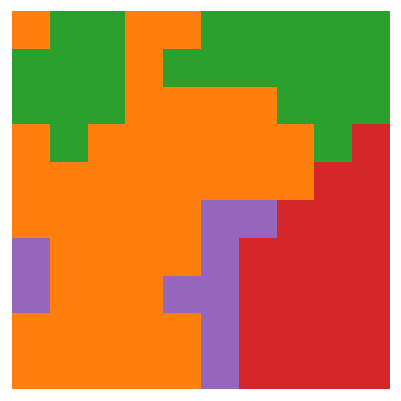

In [42]:
cmap = colors.ListedColormap(['tab:green', 'tab:red','tab:orange','tab:purple'])
mydpi=120
plt.figure(figsize=(500/mydpi,500/mydpi), dpi=mydpi)
plt.imshow(label_map, cmap=cmap)
plt.axis('off')
plt.savefig('colormap.png', bbox_inches='tight', pad_inches=0,dpi=mydpi*2000/377)
plt.show()

In [43]:
from PIL import Image, ImageDraw, ImageFont

# get an image
counter = 0
for i in range(maps.shape[0]):
    for j in range(maps.shape[1]):
        with Image.open("colormap.png").convert("RGBA") as base:
            txt = Image.new("RGBA", base.size, (255, 255, 255, 0))
            d = ImageDraw.Draw(txt)
            font1 = ImageFont.truetype("arial.ttf", 9)
            font2 = ImageFont.truetype("arial.ttf", 40)
            total = len(cl_lists[counter])+ len(col_lists[counter])+ len(coh_lists[counter])+ len(nroi_lists[counter])
            prob = "{:.2f}".format(1-max(len(cl_lists[counter])/total,len(col_lists[counter])/total,len(coh_lists[counter])/total,len(nroi_lists[counter])/total)) 
            d.text((j*200,i*200), str(f"cl:{cl_lists[counter]} \n col:{col_lists[counter]} \n coh:{coh_lists[counter]} \n nroi:{nroi_lists[counter]}"),fill=(255, 255, 255, 255),font=font1)
            d.text((j*200+100,i*200+100), str(prob),fill=(255, 255, 255, 255),font = font2)
            out = Image.alpha_composite(base, txt)
            counter+= 1
            out.save('colormap.png')
            #out.show()